Цель: Используя данный датасет https://archive.ics.uci.edu/ml/datasets/Wholesale+customers произвести кластеризацию методом k-means. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('./data/customers_data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117eb5390>,
      dtype=object)

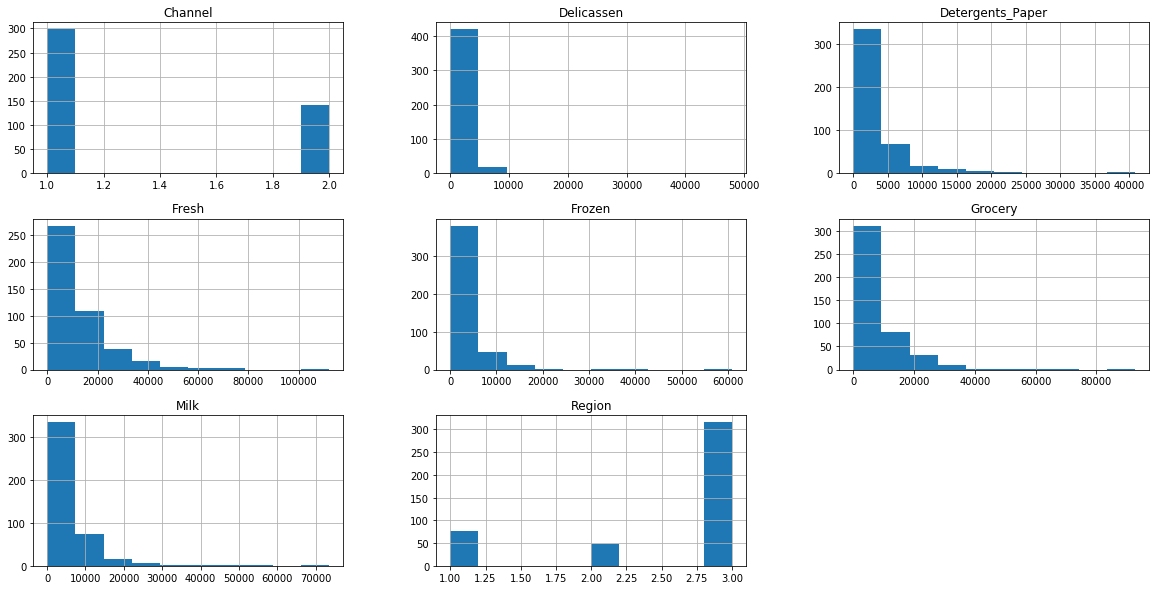

In [16]:
data.hist(figsize = (20,10))

*See:* Outliers, unbalanced data

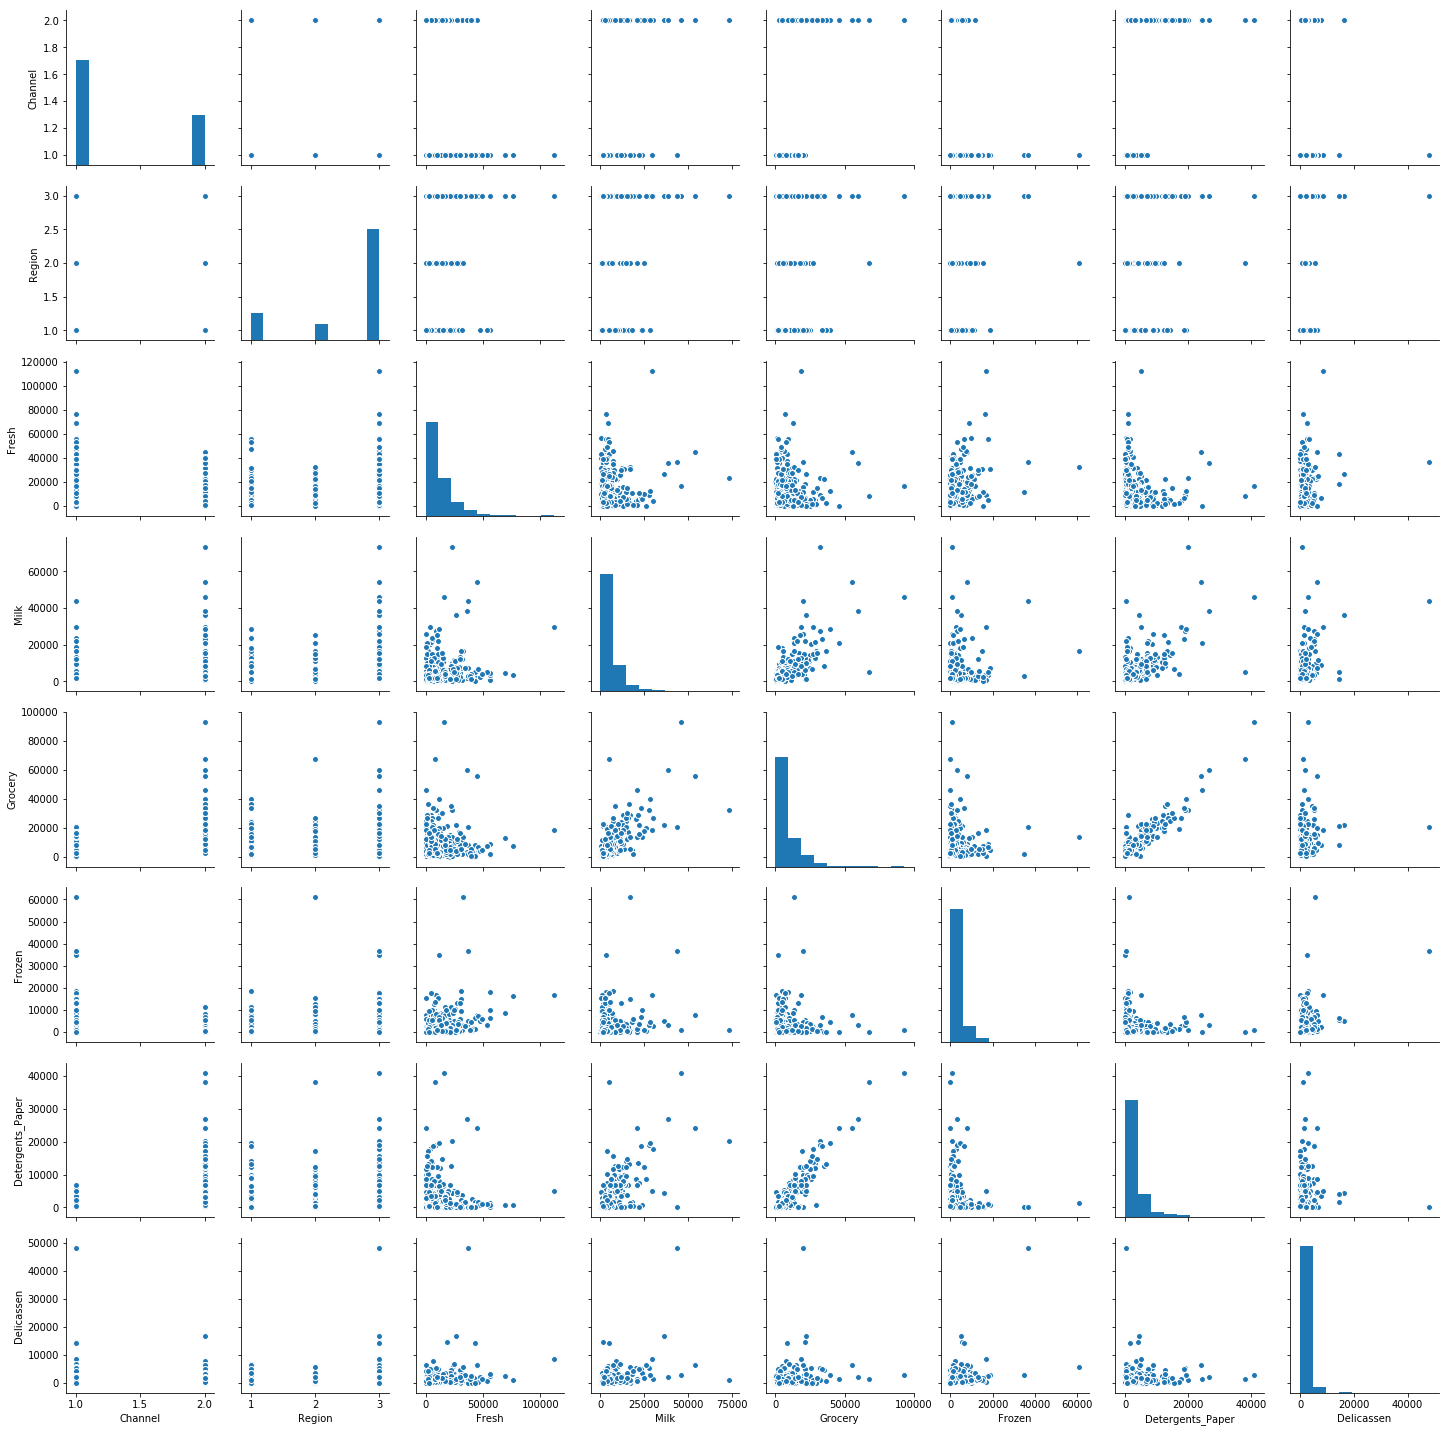

In [17]:
sns.pairplot(data)

? Correlation between Grocery and Detergents_paper

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaled = scaler.fit_transform(data)

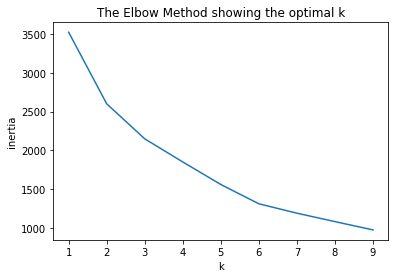

In [18]:
inertia = []
k = range(1, 10)
for k_i in k:
    km = KMeans(n_clusters=k_i).fit(scaled)
    inertia.append(km.inertia_)
    
plt.plot(k, inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal k');

Смотря на переломы, то оптимальный  k с 2 до 6

Проверить оптимальное число k с применением *silhouette score методом локтя(elbow).*

In [23]:
from sklearn.metrics import silhouette_score
silhouette = []
k = range(2, 10)
for k_i in k:
    km = KMeans(n_clusters=k_i)
    km.fit(scaled)
    silhouette.append(silhouette_score(scaled, km.predict(scaled)))

Text(0.5,1,'The Elbow Method showing the optimal k')

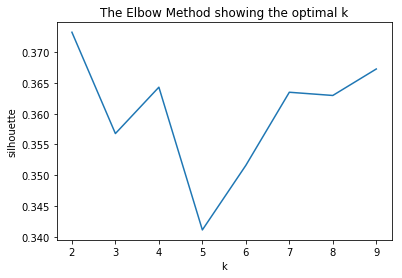

In [24]:
plt.plot(k, silhouette)
plt.xlabel('k')
plt.ylabel('silhouette')
plt.title('The Elbow Method showing the optimal k')

### Visualization

In [25]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=50)

tsne_transformed = tsne.fit_transform(scaled)

In [30]:
km = KMeans(n_clusters=5).fit(scaled)

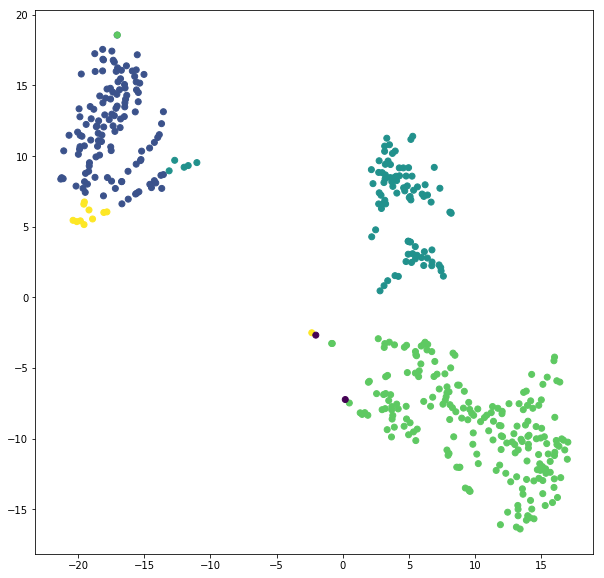

In [31]:
plt.figure(figsize=(10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c=km.labels_);